### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
 
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

font_path = "C:\\Users\\Playdata\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Pretendard-Regular.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False


당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [227]:
# 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [228]:
# 결측값이 있는 열이 있는지 확인하고, 
# 결측값이 있는 경우 적절한 방법으로 처리하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB


In [229]:
df.isna().sum()

OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64

* 결측값 없음

In [230]:
# 각 열의 데이터 타입을 확인하고, 
# OrderDate 열을 datetime 형식으로 변환하세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OrderID       120 non-null    int64  
 1   Product       120 non-null    object 
 2   Category      120 non-null    object 
 3   Quantity      120 non-null    int64  
 4   Price         120 non-null    int64  
 5   CustomerID    120 non-null    int64  
 6   Birthdate     120 non-null    object 
 7   OrderDate     120 non-null    object 
 8   Country       120 non-null    object 
 9   DiscountRate  119 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.5+ KB


In [231]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   OrderID       120 non-null    int64         
 1   Product       120 non-null    object        
 2   Category      120 non-null    object        
 3   Quantity      120 non-null    int64         
 4   Price         120 non-null    int64         
 5   CustomerID    120 non-null    int64         
 6   Birthdate     120 non-null    object        
 7   OrderDate     120 non-null    datetime64[ns]
 8   Country       120 non-null    object        
 9   DiscountRate  119 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 9.5+ KB


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [232]:
#  1. **매출액**(총 판매 금액)을 계산하는 
# 새로운 열 `TotalRevenue`를 생성하세요.

df['TotalRevenue'] = df['Price']*df['Quantity']
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000


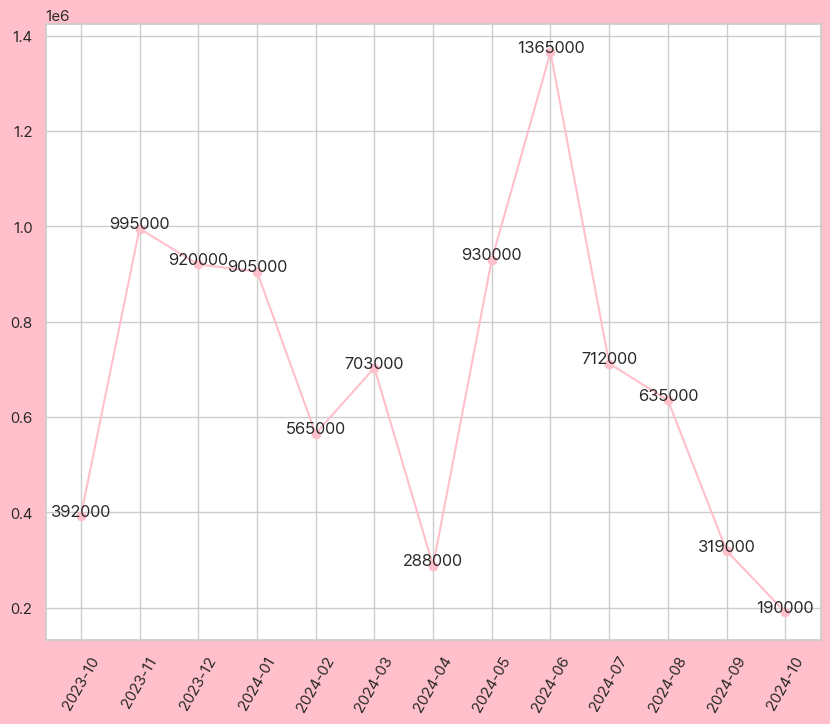

In [233]:
# 월별 총 매출액을 집계하여 시각화하세요.
df_1 = df[['OrderDate', 'TotalRevenue']].copy()
df_1_sum = pd.DataFrame()
df_1['Month'] = df_1['OrderDate'].dt.to_period('M')
df_1_sum = df_1.groupby('Month')['TotalRevenue'].sum()

fig = plt.figure(figsize=(10,8), facecolor='pink')
plt.plot(df_1_sum.index.astype(str), df_1_sum.values, label='매출액', color = 'pink', marker='o')


for i, val in enumerate(df_1_sum.values):
    # x축 위치, y축 위치, 텍스트, 텍스트 정렬(위치)
    plt.text(i, val + 100, str(val), ha='center')

plt.xticks(rotation = 60)
plt.show()


In [234]:
# 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요
df_2 = df.groupby('Category')['TotalRevenue'].sum()
df_2 = df_2.sort_values(ascending=False)
df_2[:3]

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

In [235]:
# 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.
df_3 = df.groupby('Country')['TotalRevenue'].sum()
df_3 = df_3.sort_values(ascending=False)
df_3.head()

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [236]:
#  고객별로 총 매출액을 계산한 후,
#  상위 5명의 고객을 출력하세요.

df_4 = df.groupby('CustomerID')['TotalRevenue'].sum()
df_4 = df_4.sort_values(ascending=False)
df_4.head(5)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [237]:
# 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
df_5 = df.groupby('CustomerID')['OrderID'].count()
df_5 = df_5.sort_values(ascending=False)
df_5.head(5)

CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
Name: OrderID, dtype: int64

In [238]:
# 연령대에 따라 고객을 분류하고,
# 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요
df['BirthDate'] = pd.to_datetime(df['Birthdate'])
df['BirthYear'] = df['BirthDate'].dt.year
df['Age'] = ((2025 - df['BirthYear']) // 10)*10
df_6 = df.groupby(['Age', 'Category'])['OrderID'].count()
df_6_category = df_6.groupby('Age').idxmax()
df_6_category

Age
20         (20, Beauty)
30           (30, Food)
40          (40, Books)
50    (50, Electronics)
60    (60, Electronics)
Name: OrderID, dtype: object

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [239]:
# 가장 많이 판매된 상위 5개의 상품을 출력하세요.
df_7 = df.groupby('Product')['Quantity'].sum()
df_7 = df_7.sort_values(ascending=False)
df_7.head(5)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64

In [240]:
# 카테고리별로 가장 많이 판매된 상품을 찾아 출력하세요
df_8 = df.groupby(['Category', 'Product'])['Quantity'].sum()
df_8_category = df_8.groupby('Category').idxmax()
df_8_category

Category
Beauty              (Beauty, 립스틱)
Books                 (Books, 소설)
Clothing           (Clothing, 셔츠)
Electronics    (Electronics, 노트북)
Food                   (Food, 커피)
Sports             (Sports, 요가매트)
Name: Quantity, dtype: object

In [241]:
# 평균 구매 수량이 가장 높은 상위 3개의 상품을 출력하세요
df_9 = df.groupby('Product')['Quantity'].mean()
df_9 = df_9.sort_values(ascending=False)
df_9.head(5)

Product
주스      5.0
자기계발    5.0
요가매트    4.0
커피      4.0
향수      3.6
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

In [249]:
df['OrderWeek']

0      24
1      46
2      41
3      29
4       3
       ..
115     9
116     3
117    39
118    24
119    26
Name: OrderWeek, Length: 120, dtype: UInt32

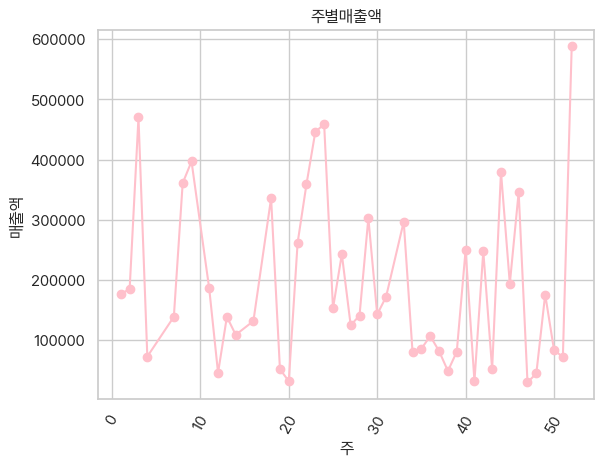

In [292]:
# 주별 매출액을 계산하고 시각화하세요.
df['OrderWeek'] = df['OrderDate'].dt.isocalendar().week
df_10 = df.groupby('OrderWeek')['TotalRevenue'].sum()
plt.plot(df_10, color = 'pink', marker='o')
plt.xlabel('주')
plt.ylabel('매출액')
plt.title('주별매출액')

plt.xticks(rotation = 60)
plt.show()

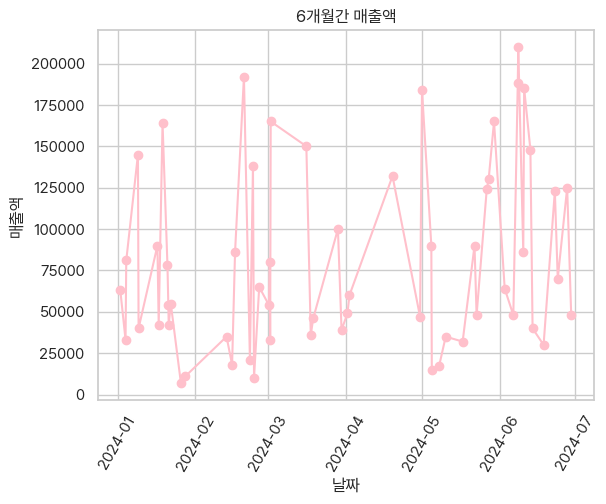

In [ ]:
# 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 
# 매출 추이를 분석하고 시각화하세요.
df_11 = df[(df['OrderDate'] >= '2024-01-01') & (df['OrderDate'] <= '2024-06-30')]
df_12 = df_11.groupby('OrderDate')['TotalRevenue'].sum()

df_12 = df_12.sort_index()

plt.plot(df_12.index, df_12.values, color='pink', marker='o')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.title('6개월간 매출액')
plt.xticks(rotation=60)
plt.show()

In [311]:
# 특정 국가에서 가장 많이 주문한 시간대를 분석하고,
df['OrderHour'] = df['OrderDate'].dt.hour
df_13 = df.groupby('Country')['OrderHour'].value_counts()
most_frequent_hours = df_13.groupby(level=0).idxmax()
most_frequent_hours

Country
대한민국    (대한민국, 10)
독일         (독일, 4)
미국         (미국, 1)
일본         (일본, 2)
중국        (중국, 23)
Name: count, dtype: object

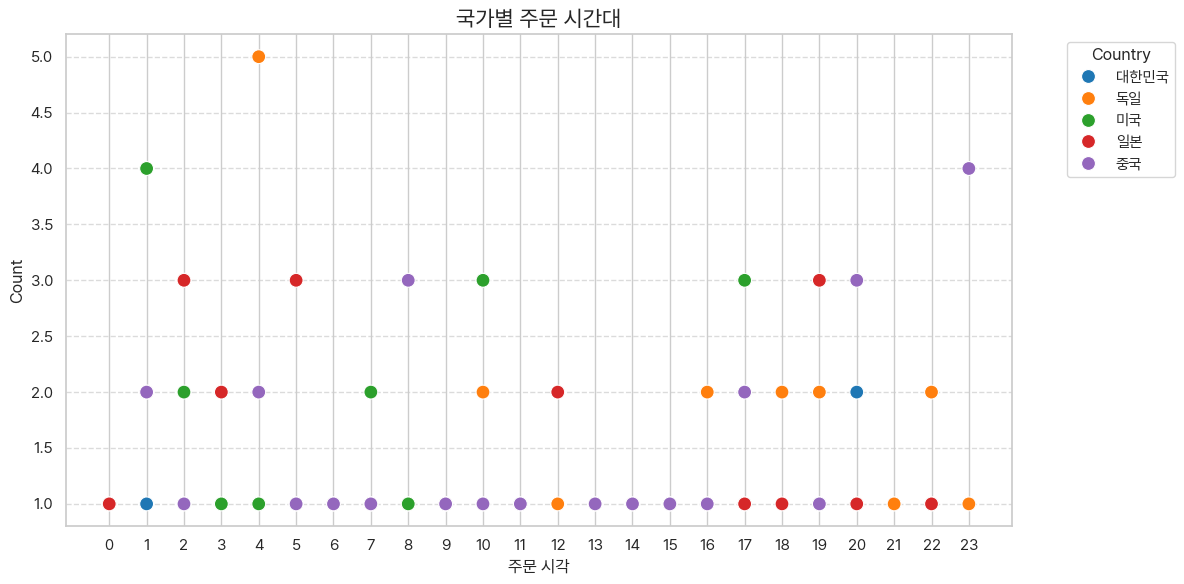

In [313]:
# 이를 시각화하여 인사이트를 도출하세요.
df_13 = df.groupby('Country')['OrderHour'].value_counts().reset_index(name='OrderCount')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_13, x='OrderHour', y='OrderCount', hue='Country', palette='tab10', s=100)
plt.title('국가별 주문 시간대', fontsize=16)
plt.xlabel('주문 시각', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 24))  # 24시간 범위 설정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [324]:
# 고객의 재구매율을 분석하세요.
df_14 = pd.DataFrame(df.groupby('CustomerID')['OrderID'].count())
# df_14[df_14['OrderID']>=2].count()
result = ((df_14[df_14['OrderID']>=2].count()) / df_14.count()) * 100
result = round(result.iloc[0], 2)
print(f'재구매울 : {result}%')

재구매울 : 8.11%


In [333]:
# 상품 카테고리별 할인을 적용한 판매 데이터를 사용하여 
df_15 = df[['Category', 'DiscountRate', 'Price']].copy()
df_15['RealPrice'] = df['Price'] - (df['Price']*df['DiscountRate'])
df_15

,Category,DiscountRate,Price,RealPrice
0,Books,0.14,37000,31820.0
1,Clothing,0.29,20000,14200.0
2,Electronics,0.23,8000,6160.0
3,Sports,0.20,8000,6400.0
4,Electronics,0.09,26000,23660.0
...,...,...,...,...
115,Electronics,0.20,33000,26400.0
116,Electronics,0.09,41000,37310.0
117,Electronics,0.09,33000,30030.0
118,Clothing,0.06,43000,40420.0


In [334]:
# 할인율이 높은 카테고리의 매출액을 분석하세요.
df_16 = df_15.groupby('Category')['DiscountRate'].max()
df_16

Category
Beauty         0.29
Books          0.29
Clothing       0.29
Electronics    0.29
Food           0.29
Sports         0.30
Name: DiscountRate, dtype: float64

* 할인율이 가장 큰 품목은 sports카테고리에 존재

In [335]:
df_17 = df_15.groupby('Category')['DiscountRate'].mean()
df_17

Category
Beauty         0.186522
Books          0.170000
Clothing       0.154000
Electronics    0.175789
Food           0.174091
Sports         0.179444
Name: DiscountRate, dtype: float64

* 평균적으로 할인율이 높은 품목이 존재하는 것은 Beauty품목

* 할인이 적용된 판매가의 매출 매출액 분석

In [336]:
df_18 = df_15.groupby('Category')['RealPrice'].sum()
df_18

Category
Beauty         440020.0
Books          400360.0
Clothing       375850.0
Electronics    461420.0
Food           510110.0
Sports         331620.0
Name: RealPrice, dtype: float64